In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pystan

In [2]:
electoral_votes = {
    'Alabama': 9,
    'Alaska': 3,
    'Arizona': 11,
    'Arkansas': 6,
    'Colorado': 9,
}

survey_results = {
    'Alabama': np.array([[611, 397, 0, 0], [799, 528, 0, 0], [793, 403, 0, 0], [288, 264, 0, 0], [353, 219, 0, 0], [997, 554, 0, 0], [312, 232, 0, 0], [409, 227, 0, 0], [319, 234, 0, 0]]),
    'Alaska': np.array([[348, 320, 0, 0], [298, 253, 0, 0], [283, 277, 0, 0], [269, 198, 0, 0], [227, 177, 0, 0], [442, 389, 0, 0], [519, 486, 0, 0], [325, 318, 0, 0], [84, 74, 0, 0]]),
    'Arizona': np.array([[522, 478, 22, 0], [313, 356, 7, 7], [291, 304, 0, 0], [270, 288, 0, 0], [236, 264, 16, 0], [180, 184, 0, 0], [133, 151, 0, 0], [269, 321, 20, 0], [230, 250, 5, 0], [3337, 3621, 0, 0], [360, 392, 0, 0], [235, 235, 0, 0], [364, 396, 8, 0], [383, 409, 9, 9], [221, 216, 0, 0], [113, 128, 0, 0], [284, 278, 0, 0], [168, 212, 0, 0], [258, 270, 0, 0], [260, 266, 0, 0], [359, 402, 9, 0], [185, 202, 17, 0], [261, 320, 26, 0], [519, 584, 0, 0], [328, 342, 0, 0], [487, 520, 0, 0], [252, 312, 0, 0], [752, 768, 0, 0], [414, 441, 0, 0], [212, 230, 0, 0], [357, 398, 0, 8], [309, 378, 23, 0], [3357, 3034, 0, 0], [396, 490, 0, 0], [162, 169, 0, 0], [325, 402, 9, 9], [445, 426, 0, 0], [311, 350, 0, 0], [188, 193, 0, 0], [466, 456, 30, 0], [271, 295, 0, 0], [204, 192, 0, 0], [522, 547, 24, 12], [2547, 2348, 0, 0], [164, 172, 0, 0], [381, 445, 0, 0], [393, 428, 0, 0], [326, 395, 17, 9], [372, 413, 0, 0], [432, 470, 0, 0], [315, 343, 0, 0], [155, 176, 0, 0], [500, 500, 0, 0], [264, 294, 0, 0], [1230, 1088, 0, 0], [270, 282, 0, 0], [137, 159, 0, 0], [258, 237, 0, 0], [337, 372, 17, 9], [266, 312, 0, 0], [616, 670, 0, 0], [88, 90, 0, 0], [421, 461, 0, 0], [148, 145, 0, 0], [368, 353, 0, 0], [180, 188, 0, 0], [388, 426, 0, 0], [258, 300, 0, 0], [230, 235, 0, 0], [258, 312, 0, 0]]),
    'Arkansas': np.array([[478, 293, 0, 0], [462, 220, 0, 0], [493, 239, 0, 0], [209, 135, 0, 0], [408, 391, 0, 0]]),
    'Colorado': np.array([[408, 510, 0, 0], [1114, 1549, 0, 0], [283, 322, 0, 0], [320, 400, 0, 0], [312, 400, 32, 8], [978, 1359, 0, 0], [262, 325, 0, 0], [252, 306, 0, 0], [246, 307, 0, 0], [246, 306, 0, 0], [240, 312, 0, 0], [935, 1355, 0, 0], [240, 320, 0, 0], [246, 306, 0, 0], [365, 481, 0, 0], [328, 470, 0, 0], [457, 620, 0, 0], [240, 286, 0, 0], [280, 371, 0, 0], [216, 330, 0, 0], [133, 201, 0, 0]]),
}

for key, value in survey_results.items():
    survey_results[key] = np.concatenate((value[:,:2], value[:,2:3] + value[:,3:4]), axis=1)

states = sorted(survey_results.keys())
print('Modeling', len(states), 'states with', sum(electoral_votes[s] for s in states), 'electoral college votes')

Modeling 5 states with 38 electoral college votes


In [3]:
stan_code = '''
data {
    int numSurveys;  // Number of surveys
    int numCandidates;  // Number of candidates
    int survey_results[numSurveys, numCandidates];  // Number of votes for each candidate in each survey
    real cauchy_loc;  // Prior hyperparameters for half-Cauchy over alpha
    real cauchy_scale;
}

parameters {
    vector<lower=0>[numCandidates] alpha;
    simplex[numCandidates] p[numSurveys];  // One probability vector for each survey
}

model {
    alpha ~ cauchy(cauchy_loc, cauchy_scale);
    for (i in 1:numSurveys) {
        p[i] ~ dirichlet(alpha);
        survey_results[i] ~ multinomial(p[i]);
    }
}
'''
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e9bad3cf5d5b2c10f73ae56508bf62ce NOW.


Alabama
[[1.29249268e+01 8.38089661e+00 4.59215918e-02]
 [2.02815644e+02 1.30440577e+02 2.57814985e-01]]


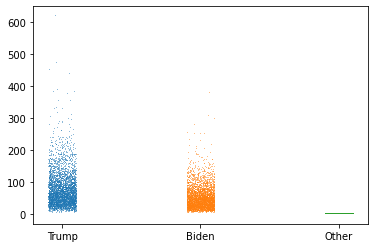

Alaska
[[3.18235051e+01 2.71449101e+01 5.69648460e-02]
 [1.11034408e+03 9.92396219e+02 6.65561432e-01]]


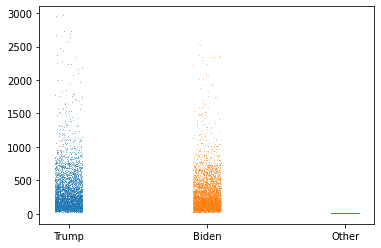

Arizona
[[29.92748134 31.95925554  0.12758725]
 [60.1932332  64.51434639  0.28900702]]


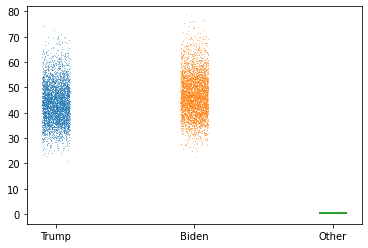

Arkansas
[[1.51759490e+00 1.05148768e+00 3.08927326e-02]
 [5.48014022e+01 3.38310093e+01 2.79862501e-01]]


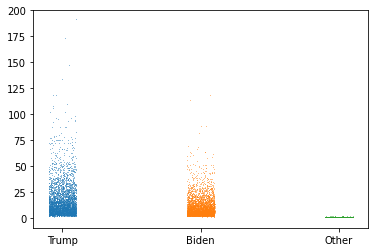

Colorado
[[2.98183860e+01 3.88145265e+01 6.39611534e-02]
 [1.23569036e+02 1.63452704e+02 2.34328326e-01]]


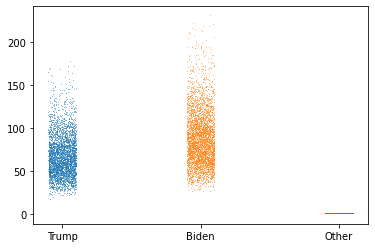

In [4]:
results = {}
for state in states:
    data = {
        'numSurveys': survey_results[state].shape[0],
        'numCandidates': 3,
        'survey_results': survey_results[state],
        'cauchy_loc': 0,
        'cauchy_scale': 1}
    results[state] = stan_model.sampling(data=data)
    samples = results[state].extract()

    print(state)
    print(np.percentile(samples['alpha'], [2.5, 97.5], axis=0))
    plt.figure(figsize=(6,4))
    for i in range(3):
        plt.plot(sts.uniform.rvs(loc=i-0.1, scale=0.2, size=4000), samples['alpha'][:,i], ',', alpha=0.5)
    plt.xticks([0, 1, 2], ['Trump', 'Biden', 'Other'])
    plt.show()

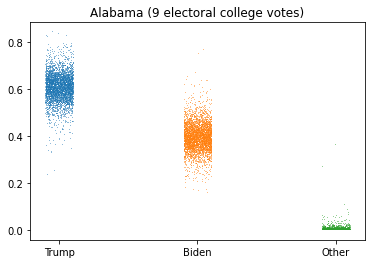

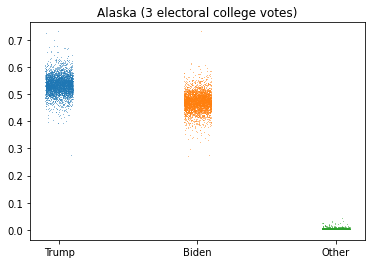

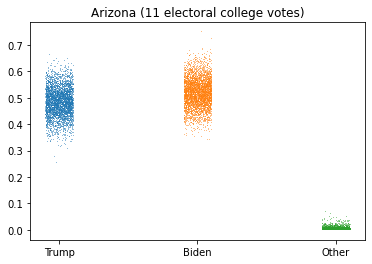

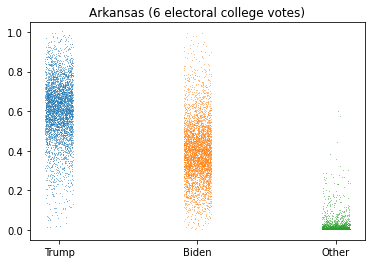

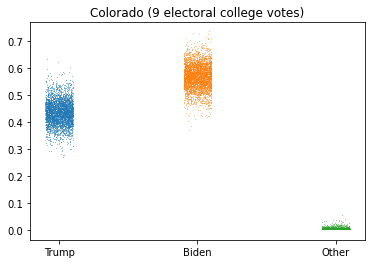

In [5]:
for state in states:
    samples = results[state].extract()
    alpha = samples['alpha']
    p_predicted = np.empty(alpha.shape)
    for i in range(alpha.shape[0]):
        p_predicted[i] = sts.dirichlet.rvs(alpha[i])

    # Plot the results
    plt.figure(figsize=(6,4))
    for i in range(3):
        plt.plot(sts.uniform.rvs(loc=i-0.1, scale=0.2, size=4000), p_predicted[:,i], ',', alpha=0.5)
    plt.title(state + ' (' + str(electoral_votes[state]) + ' electoral college votes)')
    plt.xticks([0, 1, 2], ['Trump', 'Biden', 'Other'])